# Akash Ugale

## CodeClause Internship 

### Project 2 : Sentiment Analysis 

In [28]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
import re
nltk.download('wordnet')
nltk.download('omw-1.4')
import matplotlib.pyplot as plt
import seaborn as sns 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
sentiment=pd.read_excel('G:/Projects/Codeclause internship/Sentiment Analysis/Sentiment of Airline tweets.xlsx')

In [3]:
sentiment.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada)
1,570301130888121984,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada)
2,570301083672812992,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada)
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada)
4,570300817074462016,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada)
5,570300767074180992,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33,NaN,Pacific Time (US & Canada)
6,570300616901320000,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57,San Francisco CA,Pacific Time (US & Canada)
7,570300248553348992,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29,Los Angeles,Pacific Time (US & Canada)
8,570299953286942016,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn'tâ€¦but NOW I DO! :-D",NaN,2015-02-24 11:11:19,San Diego,Pacific Time (US & Canada)
9,570295459631262976,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27,Los Angeles,Eastern Time (US & Canada)


In [4]:
sentiment.shape

(14640, 15)

In [5]:
sentiment = sentiment.drop(sentiment[sentiment['airline_sentiment_confidence']<0.5].index, axis= 0)

In [6]:
sentiment.shape

(14404, 15)

In [7]:
X = sentiment['text']
Y = sentiment['airline_sentiment']

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
punctuations = string.punctuation

In [9]:
clean_sentiment =[]
for i in range(len(X)):
    text = re.sub('[^a-zA-Z]', ' ',X.iloc[i])
    text = text.lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if (word not in stop_words) and (word not in punctuations)]
    text = ' '.join(text)
    clean_sentiment.append(text)

In [10]:
clean_sentiment

['virginamerica dhepburn said',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seat playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hat parody http co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teen',
 'virginamerica lt pretty graphic much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule still mia',
 'virginamerica excited first cross country flight lax mc

In [11]:
Y

0         neutral
2         neutral
3        negative
4        negative
5        negative
           ...   
14634    negative
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14404, dtype: object

In [12]:
sentiments = ['negative' , 'neutral', 'positive']
Y = Y.apply(lambda x: sentiments.index(x))
Y

0        1
2        1
3        0
4        0
5        0
        ..
14634    0
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14404, dtype: int64

In [13]:
Y.value_counts()

0    9115
1    2997
2    2292
Name: airline_sentiment, dtype: int64

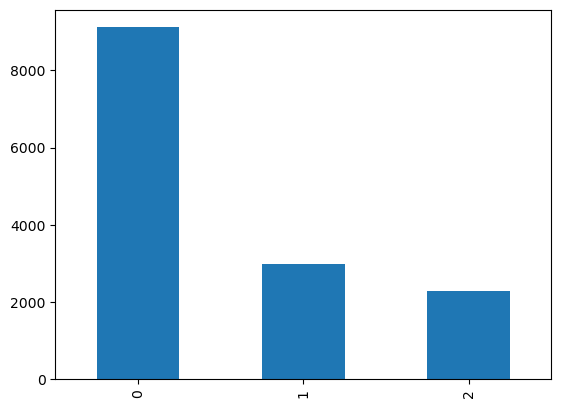

In [64]:
Y.value_counts().plot(kind="bar")
plt.show()

In [22]:
sentiment['tweet_location'].value_counts().head(20)

nan                  4653
Boston, MA            155
New York, NY          153
Washington, DC        147
New York              124
USA                   123
Chicago               101
NYC                    95
New York City          94
Los Angeles, CA        93
San Francisco, CA      91
San Francisco          85
Chicago, IL            81
Brooklyn, NY           64
Austin, TX             64
Washington, D.C.       63
Los Angeles            63
Boston                 61
Dallas, TX             54
Washington DC          53
Name: tweet_location, dtype: int64

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features = 5000, stop_words = ['virginamerica','united'])
X_fit = count_vectorizer.fit_transform(clean_sentiment).toarray()
X_fit.shape

(14404, 5000)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X_fit,Y, test_size = 0.3)

In [26]:
model = MultinomialNB()
model.fit(X_train ,Y_train)
pred_MNB = model.predict(X_test)
accuracy = accuracy_score(Y_test,pred_MNB)
print("accuracy: {}%".format(round(accuracy*100,2)))

accuracy: 76.79%


Confusion Matrix MNB:


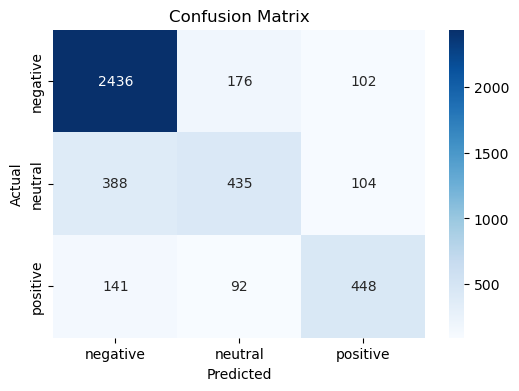

In [29]:
confusion_mat = confusion_matrix(Y_test,pred_MNB)
print("Confusion Matrix MNB:")
class_labels = ['negative' , 'neutral', 'positive']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train ,Y_train)
pred_LOGR = model.predict(X_test)
accuracy = accuracy_score(Y_test,pred_LOGR)
print("accuracy: {}%".format(round(accuracy*100,2)))

accuracy: 77.9%


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix LOGR:


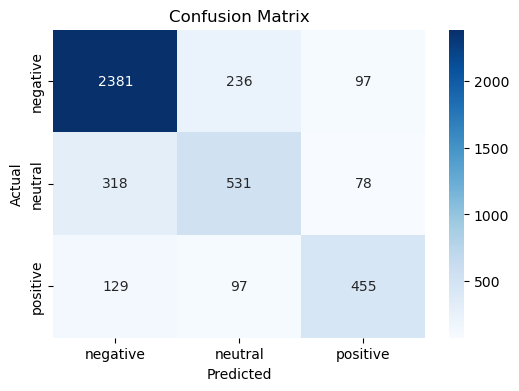

In [31]:
confusion_mat = confusion_matrix(Y_test,pred_LOGR)
print("Confusion Matrix LOGR:")
class_labels =  ['negative' , 'neutral', 'positive']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train ,Y_train)
pred_DTC = clf.predict(X_test)
accuracy = accuracy_score(Y_test,pred_DTC)
print("accuracy: {}%".format(round(accuracy*100,2)))

accuracy: 67.24%


Confusion Matrix DTC:


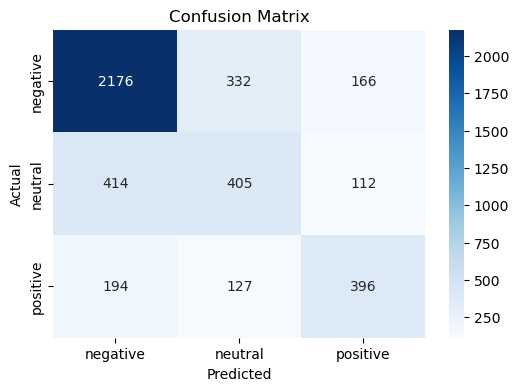

In [52]:
confusion_mat = confusion_matrix(Y_test,pred_DTC)
print("Confusion Matrix DTC:")
class_labels = ['negative' , 'neutral', 'positive']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train ,Y_train)
pred_RFC = RFC.predict(X_test)
accuracy = accuracy_score(Y_test,pred_RFC)
print("accuracy: {}%".format(round(accuracy*100,2)))

accuracy: 74.76%


Confusion Matrix RFC:


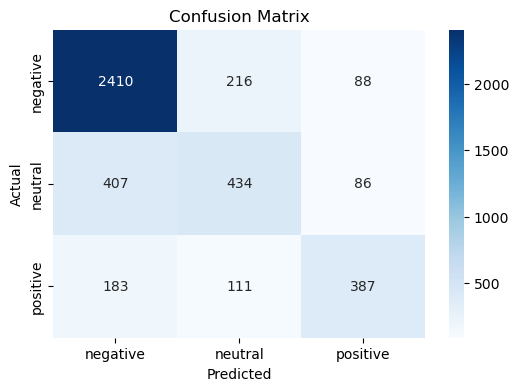

In [34]:
confusion_mat = confusion_matrix(Y_test,pred_RFC)
print("Confusion Matrix RFC:")
class_labels = ['negative' , 'neutral', 'positive']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
from sklearn.svm import SVC

svmc = SVC(kernel='linear')
svmc.fit(X_train ,Y_train)
pred_svmc = svmc.predict(X_test)
accuracy = accuracy_score(Y_test,pred_svmc)
print("accuracy: {}%".format(round(accuracy*100,2)))

accuracy: 75.98%


Confusion Matrix svmc:


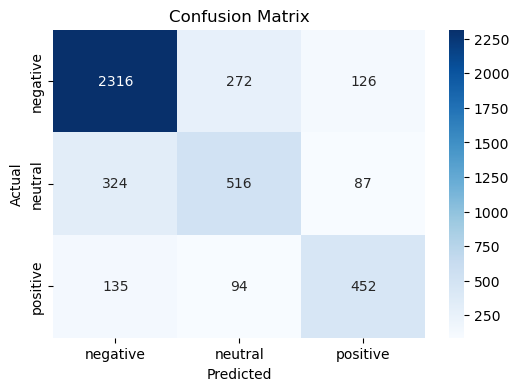

In [40]:
confusion_mat = confusion_matrix(Y_test,pred_svmc)
print("Confusion Matrix svmc:")
class_labels = ['negative' , 'neutral', 'positive']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

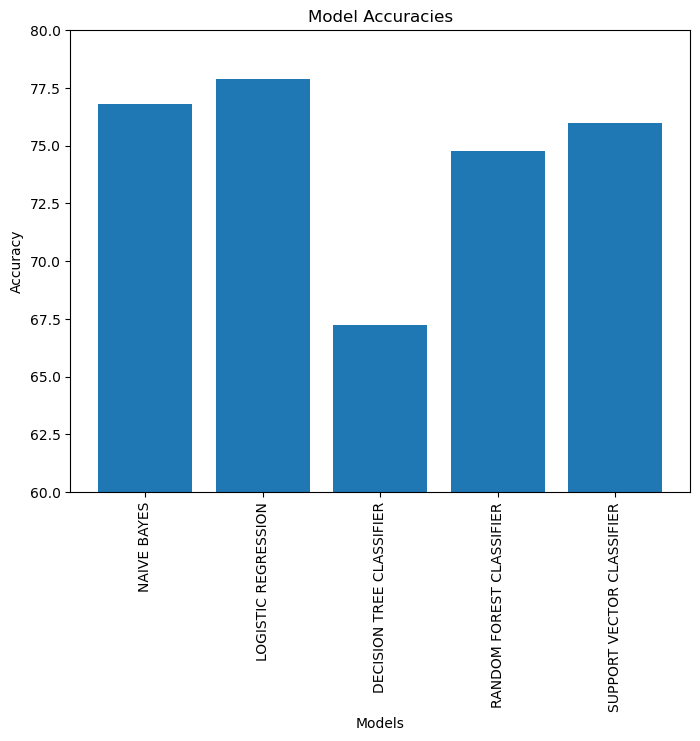

In [41]:
accuracies = [76.79,77.9,67.24,74.76,75.98]
models = ['NAIVE BAYES','LOGISTIC REGRESSION','DECISION TREE CLASSIFIER','RANDOM FOREST CLASSIFIER','SUPPORT VECTOR CLASSIFIER']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(60,80)
plt.xticks(rotation='vertical')
plt.show()